# 写在前头


曾经有从事医学工作的朋友戏言“医生看病和算命差不多，都是猜靠猜。从症状猜测可能是什么原因导致的什么病”。很多生物学数据的分析工作，尤其是像心脏病、糖尿病等复杂疾病数据分析，判断疾病状态涉及多种数据，在智能时代，我们能否靠计算机来猜测患有某种病的可能性有多大？这类对生物数据的预测分类思路一般是怎样的？普通生物学医学从业者能否快速尝试？下面结合一个具体的案例来讲解一下这类分析的一般流程。

# 问题数据集获取与描述
心脏病是一个现代人越来越容易得的病，近年来对心脏病的研究也日益增多，一个重要的问题是判断是否是心脏病并没有那么容易，我们能够通过机器学习的方法来判断一个人患有心脏病的可能性吗？

想要判断患病与否，需要先获得有助于诊断的医疗数据，本次案例使用的数据为：heart.csv，各位可在我的GitHub上或者百度网盘上下载，内附数据以及所有代码。
将下载的数据放到一个命名为data的文件夹下，
先来看看数据长什么样；


In [4]:
df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


上面数据的每一行代表一个人，其中各列分别病人的：

1. age：年龄
2. sex：性别（1 =男性; 0 =女性）
3. cpchest：疼痛类型
4. trestbps：静息血压（入院时的mm Hg）
5. chol：血清胆固醇 mg / dl
6. fbs：（空腹血糖> 120 mg / dl）（1 =真; 0 =假）
7. restecg：静息心电图结果
8. thalach：最大心率
9. exang：诱发心绞痛（1 =是; 0 =否）
10. oldpeak: 运动引起的相对于休息的ST值降低
11. slope：高峰运动ST段的斜率
12. ca: 通过蓬松染色的主要血管（0-3）的数量
13. thal：3 =正常;6 =固定缺陷;7 =可逆缺陷
14. target：是否患有心脏病 1（患心脏病）或0（不患有心脏病）

我们可以看到对于每一个病人采集了他们的14种信息，然后我们就要从这些信息来学习病人具有什么样的信息时可能会患有心脏病。
怎么做呢？

## 安装必要的分析软件

安装python3(请自行百度，已安装忽略)
打开python3（windows系统直接在在cmd里输入python即可，linux苹果系统打开终端输入python）
启动python3依次输入后：
1. pip install pandas
2. pip install numpy
3. pip install matplotlib
4. pip install seaborn
5. pip install sklearn
全部安装完成后开始编写预测用的python程序，在data文件夹的上一级目录新建文件heart.py
并写入以下代码：
下面开始一步步建立分析的过程：

## 导入需要的安装包

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 导入要分析的数据

In [5]:
df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info() #查看数据大小以及是否有缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
print(df.shape) #查看数据的维数

(303, 14)


In [16]:
df.isnull().sum() #查看各列数据的缺失情况

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe() #看看数据的分布规律，最大值，最小值，标准差等

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.


## 检查各种属性的分布规律

## 1.Sex

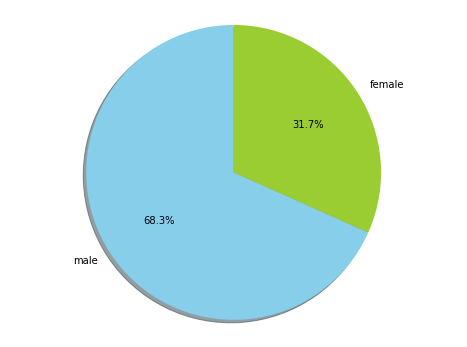

In [23]:
male = len(df[df["sex"] == 1])
female = len(df[df["sex"] == 0])

plt.figure(figsize=(8,6))

# data to plot
labels = 'male', 'female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)

#plot
plt.pie(sizes,explode = explode, labels = labels, colors = colors, 
       autopct = '%1.1f%%', shadow=True, startangle = 90)

plt.axis('equal')
plt.show()


### 2.cp

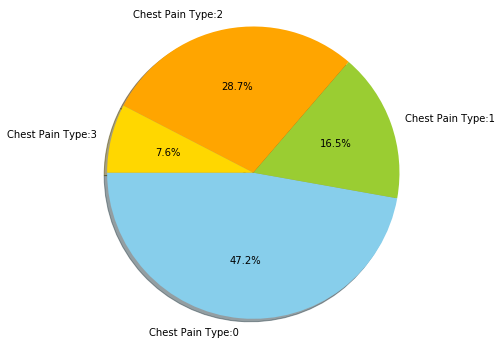

In [28]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

### 3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

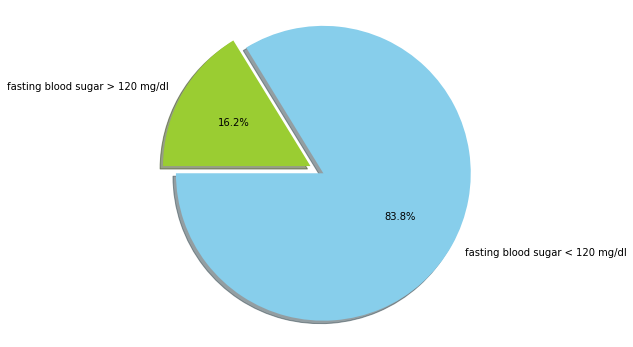

In [29]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

### 4.exang: exercise induced angina (1 = yes; 0 = no)

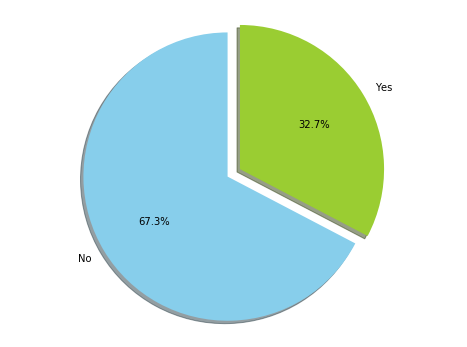

In [30]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()


## 探索性数据分析（进一步分析各指标可能存在的关系）

In [31]:
sns.set_style('whitegrid')

### 1. Heatmap

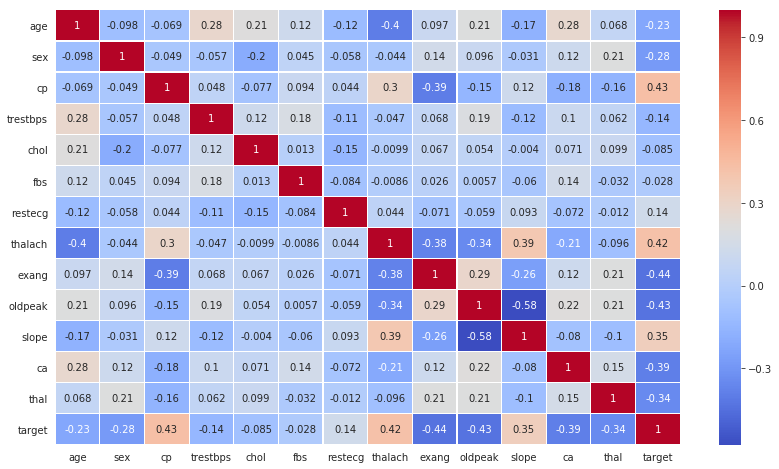

In [35]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm', linewidths = .1)
# print(df.corr())
plt.show()

上图为各指标相互之间的相关性，从蓝色到红色相关性递增，对角线为各指标与自身的相关性，为红色，表示相关性最大

## 绘制各种属性的分布

### 1. thalach: maximum heart rate achieved

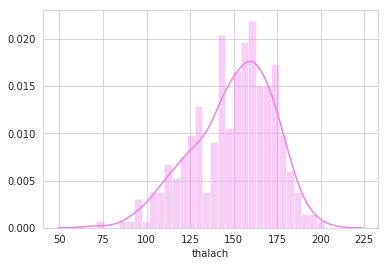

In [43]:
sns.distplot(df['thalach'],kde=True, bins = 30, color = 'violet')

### 2.chol: serum cholestoral in mg/dl 


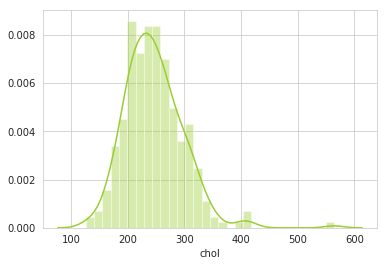

In [44]:
sns.distplot(df['chol'],kde=True,bins=30,color='yellowgreen')
plt.show()

### 3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

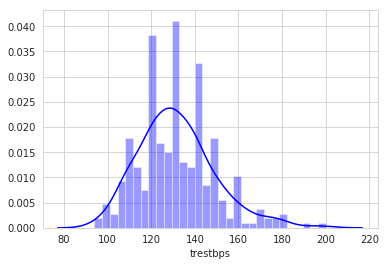

In [42]:
sns.distplot(df['trestbps'],kde=True,bins=30,color='blue')
plt.show()

### 4. Number of people who have heart disease according to age

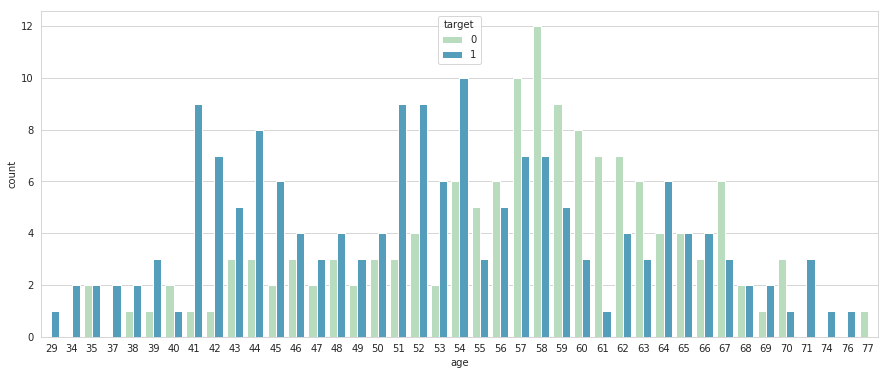

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

### 5.Scatterplot for thalach vs. chol 

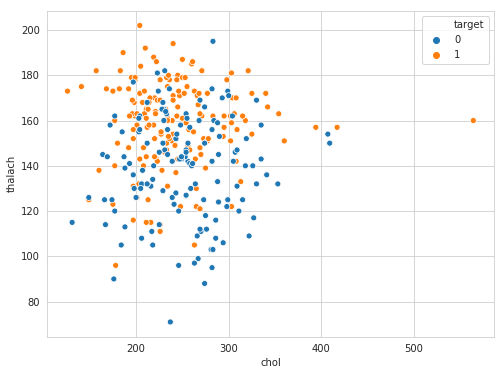

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

上图画出了如果只考虑chol和thalach这两个指标时，患有心脏病与没有患心脏病的病人之间的分布，以此来看患病和不患病的数据是否容易分开。从这张图看来，数据有一定可分性，但是交叉部分挺大，不太好区分。

### 6.Scatterplot for thalach vs. trestbps

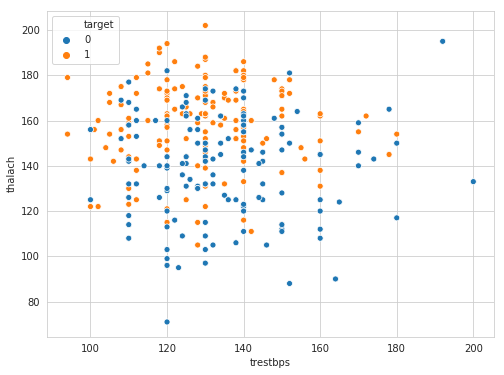

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

上图画出了如果只考虑trestbps和thalach这两个指标时，患有心脏病与没有患心脏病的病人之间的分布，以此来看患病和不患病的数据是否容易分开。从这张图看来，数据有一定可分性，但是交叉部分挺大，不太好区分。

从上面两张图总结来看，单独只考虑某两个指标都有一定区分性，这启示我们把这几个指标结合起来考虑是否会有更好的效果？那么问题来了，结合多个指标后我们怎么进行具体的区分？还是画图来看吗？二维平面图能否画出来？如何量化？到了这里就需要我们使用机器学习算法来做这些工作了。

## 使用机器学习算法进行预测

### 将数据集拆分为训练和测试集
为了更好的评估算法效果，我们将原来的数据拆分为两部分，一部分用来训练模型，一部分用来评估模型的好坏。


In [55]:
X= df.drop('target',axis=1)
y=df['target']


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

## 预处理 - 缩放功能
由于数据的各指标数值大小范围不一样，这会影响我们对于某个指标是否更重要的判断，所以先将所有指标统一缩放到一个范围内。

In [58]:
from sklearn.preprocessing import MinMaxScaler


In [112]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)

X_test = pd.DataFrame(X_test_scaled)
# print(X_test)

## 实现GridSearchCv以选择最佳参数并应用k-NN算法
在这里我选择了机器学习里的k-NN算法来做预测，当然也可以选择其他算法

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

In [62]:
model = GridSearchCV(knn,params,cv=10) #模型参数的设置和选择，这里直接设置好了，实际使用中这部分需要仔细尝试和研究才能找到最合适的参数

In [63]:
model.fit(X_train,y_train)
model.best_params_

/home/luwei/anaconda3/envs/ai/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 7}

到这里就训练完了，那么接下来就要用数据来测试我们训练好的模型，看看效果

## 做出预测

In [82]:
predict = model.predict(X_test)
prob = model.predict_proba(X_test)

## Checking accuracy

### 算法模型训练好以后，我们有许多方法来判断模型的好坏，这些方法有：

### 1.Checking accuracy
计算准确率，看看模型能够预测准多少？

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')
cnf_matrix = confusion_matrix(y_test,predict)
# print(roc_curve(y_test,predict))

Accuracy Score:  0.8131868131868132
Using k-NN we get an accuracy score of:  81.319 %


### 2.Confusion Matrix
混淆矩阵，看看模型在各类别上预测的对错情况，比如说把有病预测成没病，把没病预测成有病等等

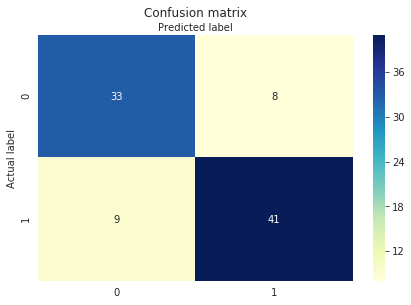

In [109]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


###  3.precision指标 recall  f1-score/
precision：预测为有病的样本中有多少是真正的有病样本
recall：样本中的真正有病的有多少被预测正确了
f1-score：是精确值precision和召回率recall的调和均值

In [123]:

# 分类报告：precision/recall/fi-score/均值/分类个数
target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_test, predict, target_names=target_names))

preds = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

              precision    recall  f1-score   support

     class 0       0.79      0.80      0.80        41
     class 1       0.84      0.82      0.83        50

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### 4.ROC曲线和AUC值 

<Figure size 576x432 with 0 Axes>

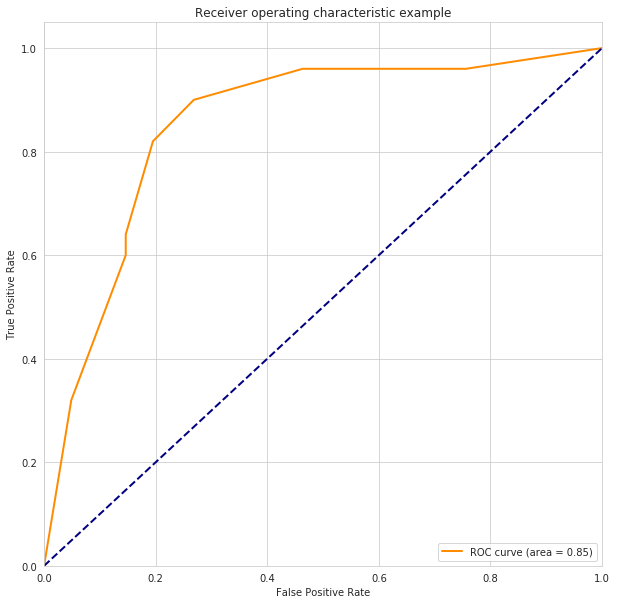

In [124]:
plt.figure(figsize=(8,6))
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC curve面积越接近1越好，从图中我们看到使用K-NN算法的面积为0.85，效果还可以，若能达到0.95以上就非常好了。